In [68]:
import tensorflow as tf
import zipfile


In [2]:
!curl -O https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip = zipfile.ZipFile('pizza_steak.zip')
zip.extractall()
zip.close()
zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  104M    0 34304    0     0  34384      0  0:53:05 --:--:--  0:53:05 34441
  0  104M    0  640k    0     0   321k      0  0:05:32  0:00:01  0:05:31  322k
 12  104M   12 12.5M    0     0  4315k      0  0:00:24  0:00:02  0:00:22 4318k
 30  104M   30 31.7M    0     0  8080k      0  0:00:13  0:00:04  0:00:09 8085k
 48  104M   48 50.4M    0     0  10.0M      0  0:00:10  0:00:04  0:00:06 10.1M
 66  104M   66 69.2M    0     0  11.5M      0  0:00:09  0:00:05  0:00:04 13.8M
 83  104M   83 86.8M    0     0  12.4M      0  0:00:08  0:00:06  0:00:02 17.2M
100  104M  100  104M    0     0  13.2M      0  0:00:07  0:00:07 --:--:-- 18.8M
'wget' is not recognized as an internal or external command,
operable program or batch file.


<zipfile.ZipFile [closed]>

In [3]:
import os
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

there are 2 directories and 0 images in pizza_steak
there are 2 directories and 0 images in pizza_steak\test
there are 0 directories and 250 images in pizza_steak\test\pizza
there are 0 directories and 250 images in pizza_steak\test\steak
there are 2 directories and 0 images in pizza_steak\train
there are 0 directories and 750 images in pizza_steak\train\pizza
there are 0 directories and 750 images in pizza_steak\train\steak


In [4]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[]


In [5]:
import pathlib
import numpy as np
data_dir=pathlib.Path('pizza_steak/train')
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)


['pizza' 'steak']


In [65]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"image shape: {img.shape}")
    return img

['1530833.jpg']
image shape: (512, 512, 3)


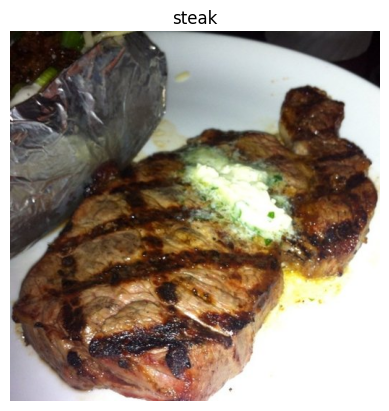

In [7]:
img=view_random_image(target_dir="pizza_steak/train/", target_class="steak")

In [8]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 26,  16,   7],
        [ 26,  16,   7],
        [ 24,  15,   6],
        ...,
        [  2,   2,   2],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 24,  14,   5],
        [ 23,  14,   5],
        [ 24,  15,   6],
        ...,
        [  2,   2,   2],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[ 21,  12,   3],
        [ 22,  13,   4],
        [ 24,  15,   6],
        ...,
        [  2,   2,   2],
        [  3,   3,   3],
        [  3,   3,   3]],

       ...,

       [[165, 161, 176],
        [166, 162, 177],
        [167, 163, 178],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[164, 160, 175],
        [165, 161, 176],
        [166, 162, 177],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[162, 158, 173],
        [164, 160, 175],
        [166, 162, 177],
        ...,
        [255, 255, 25

In [9]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
from keras.api.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.api.models import Sequential

tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1. / 255)
valid_datagen = ImageDataGenerator(rescale=1. / 255)

train_dir = "/Artificial/TENSORFLOW/pizza_steak/train/"
test_dir = "/Artificial/TENSORFLOW/pizza_steak/test/"

#import data frm directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

model1 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2, padding='valid'),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid'),
])

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
his1 = model1.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                  validation_data=valid_data, validation_steps=len(valid_data), verbose=2)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


D:\Artificial\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\Artificial\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 - 10s - 209ms/step - accuracy: 0.6940 - loss: 0.5692 - val_accuracy: 0.8200 - val_loss: 0.4067
Epoch 2/5
47/47 - 6s - 133ms/step - accuracy: 0.7913 - loss: 0.4659 - val_accuracy: 0.8440 - val_loss: 0.3888
Epoch 3/5
47/47 - 6s - 134ms/step - accuracy: 0.8033 - loss: 0.4551 - val_accuracy: 0.8500 - val_loss: 0.3553
Epoch 4/5
47/47 - 6s - 130ms/step - accuracy: 0.8160 - loss: 0.4071 - val_accuracy: 0.8520 - val_loss: 0.3742
Epoch 5/5
47/47 - 6s - 130ms/step - accuracy: 0.8360 - loss: 0.3891 - val_accuracy: 0.8780 - val_loss: 0.3268


In [10]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [5]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255)
valid_datagen = ImageDataGenerator(rescale=1. / 255)

train_dir = "/Artificial/TENSORFLOW/pizza_steak/train/"
test_dir = "/Artificial/TENSORFLOW/pizza_steak/test/"

#import data frm directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [12]:
from keras.api.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.api.models import Sequential

tf.random.set_seed(42)

model2=Sequential([
    Flatten(input_shape=(224, 224, 3)),
    Dense(4, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
his2=model2.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                validation_data=valid_data, validation_steps=len(valid_data), verbose=2)

Epoch 1/5


D:\Artificial\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 - 4s - 90ms/step - accuracy: 0.4973 - loss: 1.4110 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 - 3s - 70ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/5
47/47 - 4s - 90ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 - 6s - 118ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 - 6s - 118ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932


In [13]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

In [14]:
tf.random.set_seed(42)
model3 = Sequential([
    Flatten(input_shape=(224, 224, 3)),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

his3 = model3.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data,
                  validation_steps=len(valid_data), verbose=2)

Epoch 1/5
47/47 - 10s - 211ms/step - accuracy: 0.5907 - loss: 4.7310 - val_accuracy: 0.7620 - val_loss: 0.5411
Epoch 2/5
47/47 - 6s - 128ms/step - accuracy: 0.7247 - loss: 0.6116 - val_accuracy: 0.5820 - val_loss: 0.9221
Epoch 3/5
47/47 - 8s - 164ms/step - accuracy: 0.7367 - loss: 0.5716 - val_accuracy: 0.7500 - val_loss: 0.5668
Epoch 4/5
47/47 - 8s - 175ms/step - accuracy: 0.7453 - loss: 0.5523 - val_accuracy: 0.7420 - val_loss: 0.5639
Epoch 5/5
47/47 - 7s - 144ms/step - accuracy: 0.7973 - loss: 0.4628 - val_accuracy: 0.6020 - val_loss: 0.8179


In [4]:
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/test/", "pizza")

NameError: name 'plt' is not defined

In [7]:
#Preproccessing data

train_dir = "/Artificial/TENSORFLOW/pizza_steak/train/"
test_dir = "/Artificial/TENSORFLOW/pizza_steak/test/"

#Into batches

from keras_preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32, )
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [29]:
from keras.api.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.api.models import Sequential
from keras.api.optimizers import Adam
from keras.api.losses import binary_crossentropy

model4 = Sequential([
    Conv2D(filters=10,
           kernel_size=(3,3),
           strides=(1,1),
           padding='valid',
           activation='relu',
           input_shape=(224, 224, 3)),  # input layer (specify input shape)
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model4.compile(optimizer=Adam(), loss=binary_crossentropy, metrics=['accuracy'])
his4 = model4.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                  validation_data=valid_data, validation_steps=len(valid_data), verbose=2)

Epoch 1/5
47/47 - 8s - 169ms/step - accuracy: 0.6813 - loss: 0.6076 - val_accuracy: 0.8160 - val_loss: 0.4160
Epoch 2/5
47/47 - 7s - 149ms/step - accuracy: 0.8373 - loss: 0.3938 - val_accuracy: 0.8660 - val_loss: 0.3692
Epoch 3/5
47/47 - 7s - 154ms/step - accuracy: 0.9240 - loss: 0.2282 - val_accuracy: 0.8380 - val_loss: 0.3775
Epoch 4/5
47/47 - 8s - 178ms/step - accuracy: 0.9787 - loss: 0.0939 - val_accuracy: 0.8340 - val_loss: 0.4459
Epoch 5/5
47/47 - 7s - 143ms/step - accuracy: 0.9887 - loss: 0.0471 - val_accuracy: 0.7740 - val_loss: 0.7871


<Axes: >

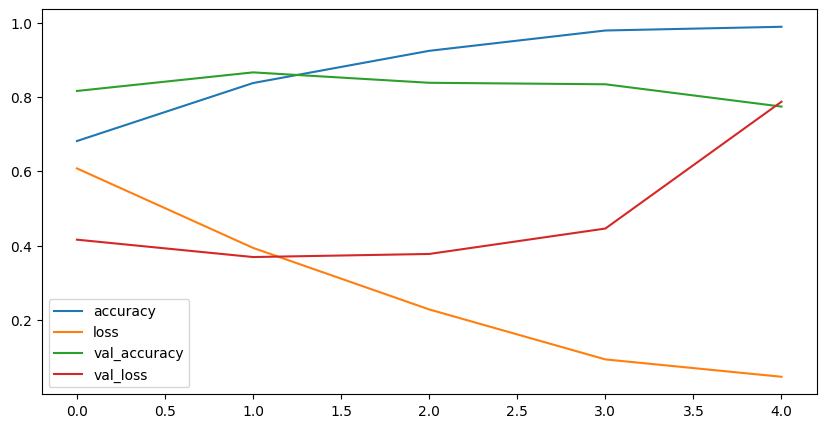

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(his4.history).plot(figsize=(10, 5))

In [16]:
def  plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epoch=range(len(history.history['loss']))

#loss
    plt.plot(epoch,loss,label='train loss')
    plt.plot(epoch,val_loss,label='val loss')
    plt.title('loss')
    plt.xlabel('epoch')
    plt.legend()

#accuracy
    plt.figure()
    plt.plot(epoch,accuracy,label='train accuracy')
    plt.plot(epoch,val_acc,label='val accuracy')
    plt.title('loss')
    plt.xlabel('epoch')
    plt.legend()

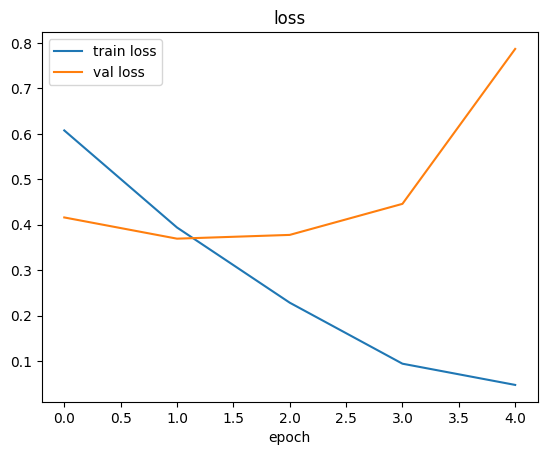

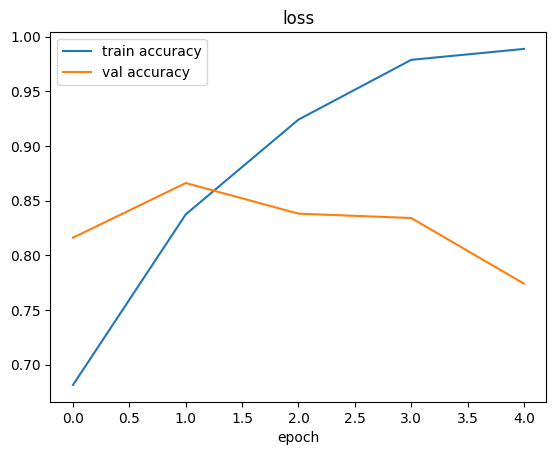

In [31]:
plot_loss_curves(his4)

In [35]:
from keras.api.layers import MaxPool2D

#Adjust overfitting

model5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])
model5.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
his5 = model5.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data,
                  validation_steps=len(valid_data), verbose=2)

Epoch 1/5
47/47 - 6s - 120ms/step - accuracy: 0.5733 - loss: 0.6878 - val_accuracy: 0.7820 - val_loss: 0.5550
Epoch 2/5
47/47 - 5s - 103ms/step - accuracy: 0.7580 - loss: 0.5160 - val_accuracy: 0.7720 - val_loss: 0.4793
Epoch 3/5
47/47 - 5s - 105ms/step - accuracy: 0.7847 - loss: 0.4664 - val_accuracy: 0.8060 - val_loss: 0.4242
Epoch 4/5
47/47 - 4s - 94ms/step - accuracy: 0.8100 - loss: 0.4253 - val_accuracy: 0.8480 - val_loss: 0.3622
Epoch 5/5
47/47 - 4s - 95ms/step - accuracy: 0.8313 - loss: 0.3916 - val_accuracy: 0.8620 - val_loss: 0.3441


In [36]:
model5.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

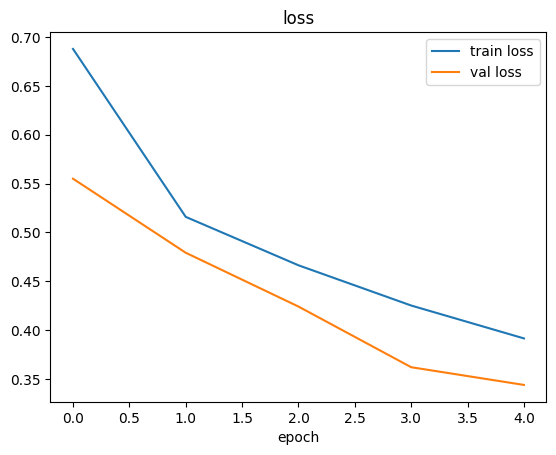

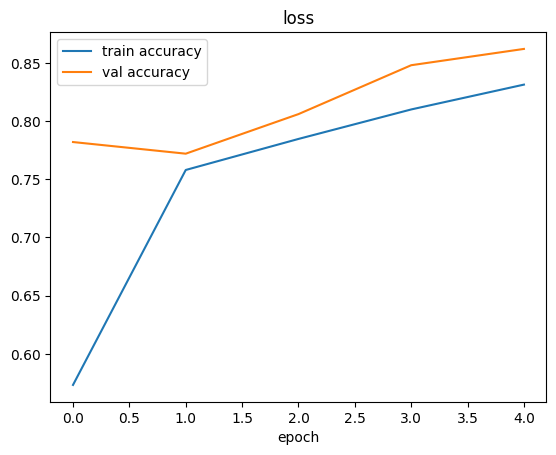

In [38]:
plot_loss_curves(his5)

In [43]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [44]:
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [ ]:
import random
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [56]:
model6 = Sequential([
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model6.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=['accuracy'])
hits6 = model6.fit(train_data_augmented,
                   epochs=5,
                   steps_per_epoch=len(train_data_augmented),
                   validation_data=test_data,
                   validation_steps=len(test_data), verbose=2)

Epoch 1/5
47/47 - 17s - 367ms/step - accuracy: 0.5000 - loss: 0.7533 - val_accuracy: 0.5000 - val_loss: 0.6836
Epoch 2/5
47/47 - 12s - 247ms/step - accuracy: 0.4980 - loss: 0.6937 - val_accuracy: 0.6960 - val_loss: 0.6868
Epoch 3/5
47/47 - 11s - 243ms/step - accuracy: 0.6007 - loss: 0.7056 - val_accuracy: 0.7440 - val_loss: 0.6719
Epoch 4/5
47/47 - 12s - 246ms/step - accuracy: 0.5400 - loss: 0.6943 - val_accuracy: 0.6620 - val_loss: 0.6803
Epoch 5/5
47/47 - 11s - 244ms/step - accuracy: 0.5407 - loss: 0.6889 - val_accuracy: 0.5520 - val_loss: 0.6519


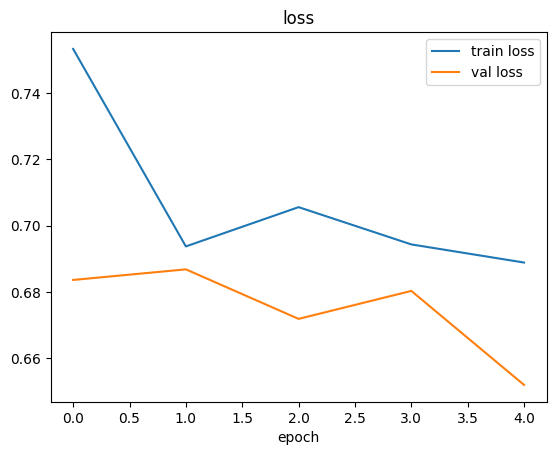

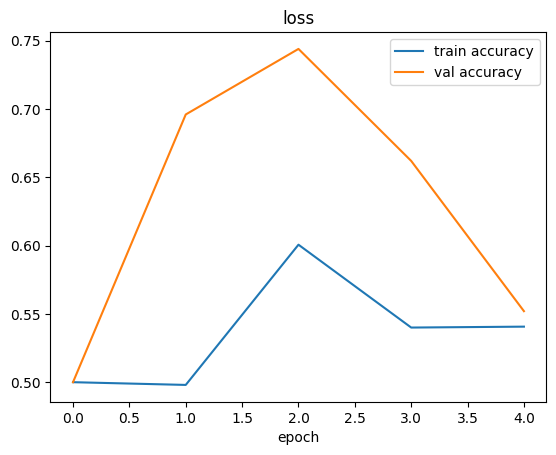

In [57]:
plot_loss_curves(hits6)

In [58]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [62]:
model7 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model7.compile(loss='binary_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])

# Fit the model
his7 = model7.fit(train_data_augmented_shuffled,
                  epochs=5,
                  steps_per_epoch=len(train_data_augmented_shuffled),
                  validation_data=test_data,
                  validation_steps=len(test_data), verbose=2)

Epoch 1/5
47/47 - 13s - 278ms/step - accuracy: 0.5993 - loss: 0.6647 - val_accuracy: 0.7260 - val_loss: 0.5357
Epoch 2/5
47/47 - 12s - 251ms/step - accuracy: 0.7187 - loss: 0.5494 - val_accuracy: 0.8520 - val_loss: 0.4060
Epoch 3/5
47/47 - 12s - 252ms/step - accuracy: 0.7767 - loss: 0.4760 - val_accuracy: 0.8740 - val_loss: 0.3416
Epoch 4/5
47/47 - 12s - 247ms/step - accuracy: 0.7753 - loss: 0.4788 - val_accuracy: 0.8580 - val_loss: 0.3285
Epoch 5/5
47/47 - 12s - 249ms/step - accuracy: 0.7813 - loss: 0.4758 - val_accuracy: 0.8720 - val_loss: 0.3363


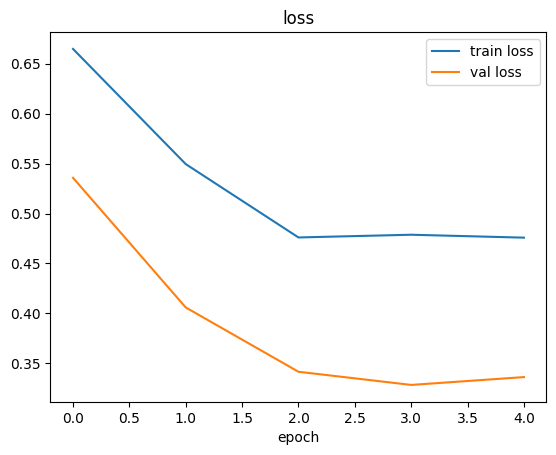

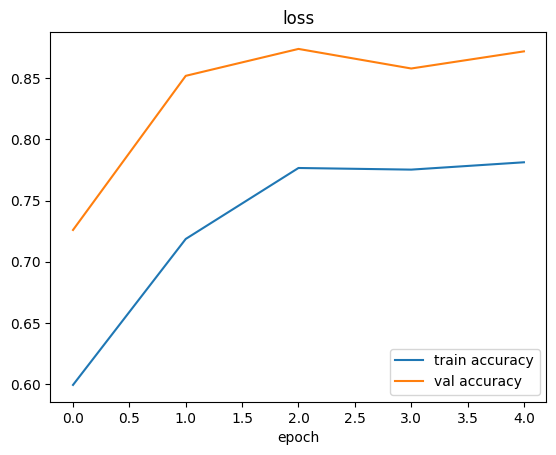

In [63]:
plot_loss_curves(his7)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 36 1931k   36  702k    0     0   903k      0  0:00:02 --:--:--  0:00:02  904k
100 1931k  100 1931k    0     0  1886k      0  0:00:01  0:00:01 --:--:-- 1890k


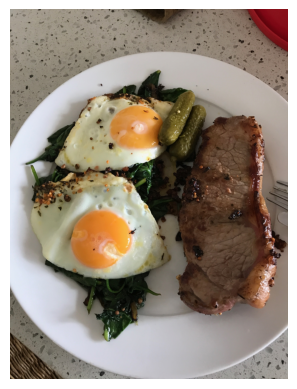

In [69]:
!curl -O https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [70]:
import zipfile

!curl -O https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  495M    0 37060    0     0  42553      0  3:23:20 --:--:--  3:23:20 42597
  0  495M    0 2400k    0     0  1279k      0  0:06:36  0:00:01  0:06:35 1280k
  3  495M    3 17.6M    0     0  6291k      0  0:01:20  0:00:02  0:01:18 6294k
  7  495M    7 35.4M    0     0  9370k      0  0:00:54  0:00:03  0:00:51 9372k
 10  495M   10 54.0M    0     0  11.0M      0  0:00:44  0:00:04  0:00:40 11.1M
 14  495M   14 72.1M    0     0  12.2M      0  0:00:40  0:00:05  0:00:35 14.4M
 17  495M   17 88.6M    0     0  12.8M      0  0:00:38  0:00:06  0:00:32 17.2M
 21  495M   21  106M    0     0  13.4M      0  0:00:36  0:00:07  0:00:29 17.5M
 25  495M   25  124M    0     0  14.0M      0  0:00:35  0:00:08  0:00:27 17.7M
 28  495M   28  140M    0     0  14.2M      0  0:00

In [71]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data\test'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'.
There are 

In [72]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [73]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['3092186.jpg']
image shape: (512, 512, 3)


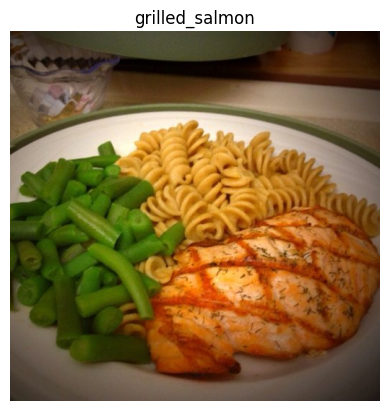

In [76]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [77]:

from keras_preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [78]:
import tensorflow as tf
from keras.api.layers import Conv2D, MaxPool2D, Flatten, Dense

model_1 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history1 = model_1.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data), verbose=2)

Epoch 1/5
235/235 - 37s - 157ms/step - accuracy: 0.2249 - loss: 2.1249 - val_accuracy: 0.3092 - val_loss: 1.9481
Epoch 2/5
235/235 - 32s - 136ms/step - accuracy: 0.3717 - loss: 1.8341 - val_accuracy: 0.3576 - val_loss: 1.8474
Epoch 3/5
235/235 - 33s - 141ms/step - accuracy: 0.5141 - loss: 1.4726 - val_accuracy: 0.3456 - val_loss: 1.9210
Epoch 4/5
235/235 - 32s - 136ms/step - accuracy: 0.7179 - loss: 0.8779 - val_accuracy: 0.3100 - val_loss: 2.4717
Epoch 5/5
235/235 - 31s - 134ms/step - accuracy: 0.8899 - loss: 0.3532 - val_accuracy: 0.3100 - val_loss: 3.3478


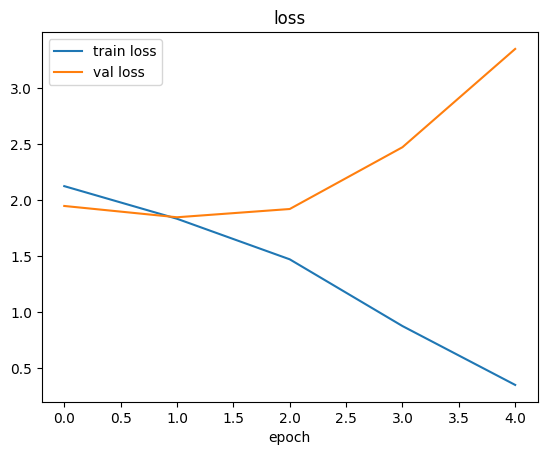

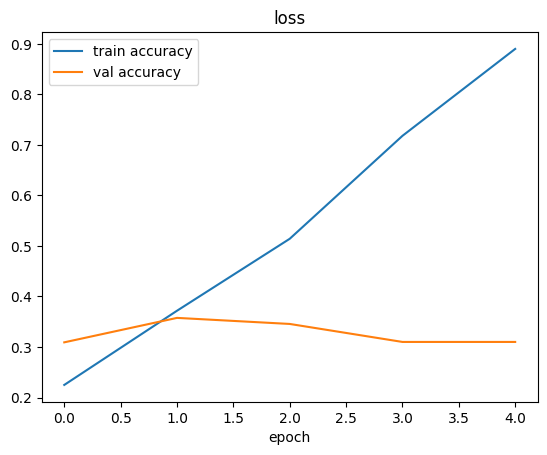

In [79]:
plot_loss_curves(history1)


In [81]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [83]:
model_2 = tf.keras.models.clone_model(model_1)

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data_augmented,
                         epochs=5,
                         steps_per_epoch=len(train_data_augmented),
                         validation_data=test_data,
                         validation_steps=len(test_data), verbose=2)


Epoch 1/5
235/235 - 118s - 500ms/step - accuracy: 0.2192 - loss: 2.1577 - val_accuracy: 0.2804 - val_loss: 1.9974
Epoch 2/5
235/235 - 116s - 492ms/step - accuracy: 0.2613 - loss: 2.0559 - val_accuracy: 0.3252 - val_loss: 1.9142
Epoch 3/5
235/235 - 96s - 408ms/step - accuracy: 0.2837 - loss: 2.0093 - val_accuracy: 0.3668 - val_loss: 1.8560
Epoch 4/5
235/235 - 70s - 297ms/step - accuracy: 0.3191 - loss: 1.9554 - val_accuracy: 0.3404 - val_loss: 1.8508
Epoch 5/5
235/235 - 72s - 308ms/step - accuracy: 0.3337 - loss: 1.9164 - val_accuracy: 0.3980 - val_loss: 1.7683


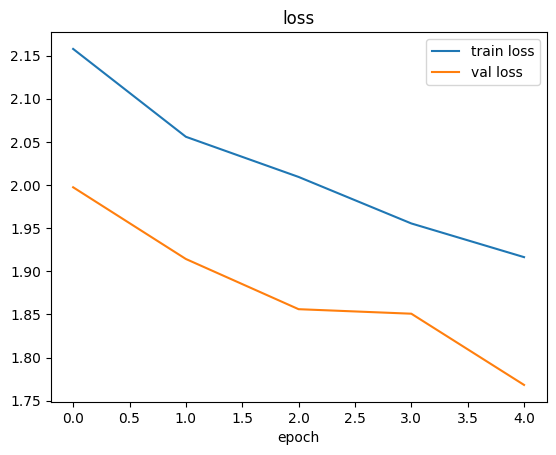

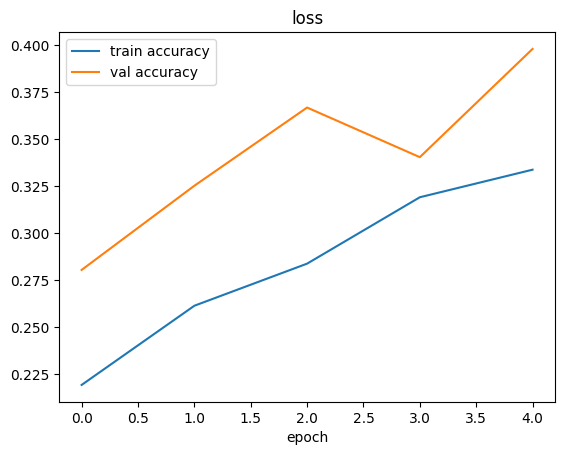

In [84]:
plot_loss_curves(history_2)

In [85]:
!curl -O -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!curl -O -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!curl -O -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!curl -O -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 68 2807k   68 1936k    0     0  2421k      0  0:00:01 --:--:--  0:00:01 2423k
100 2807k  100 2807k    0     0  3313k      0 --:--:-- --:--:-- --:--:-- 3318k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1931k  100 1931k    0     0  2720k      0 --:--:-- --:--:-- --:--:-- 2728k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 3480k    0     0    0     0      0      0 --:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


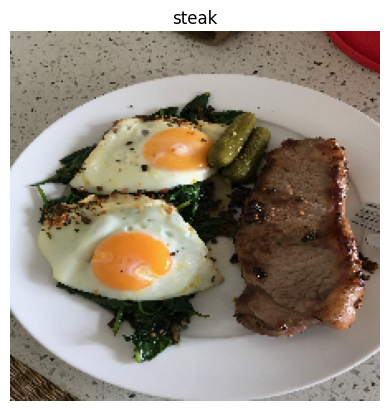

In [94]:
def load_and_prep_image(filename, img_shape=224):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, size=[img_shape, img_shape])

    img = img / 255.
    return img


def pred_and_plot(model, filename, class_names):
    """
    Imports an image located at filename, makes a prediction on it with
    a trained model and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    pred_class = class_names[int(tf.round(pred)[0][0])]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);


# Load in and preprocess our custom image
img = load_and_prep_image("03-steak.jpeg")

# Make a prediction
pred = model_2.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

In [95]:
pred = model_2.predict(tf.expand_dims(img, axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[0.03731845, 0.02647479, 0.04775806, 0.29284295, 0.06001537,
        0.02486625, 0.01356434, 0.1709278 , 0.2946608 , 0.03157109]],
      dtype=float32)